# サポートベクターマシンの分類

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.0


# 線形サポートベクターマシンモデル

L2正規化を用いて分類を行う。  
通常SVMと呼ばれているアルゴリズムの原型となるモデル。

## データセットの読み込み

In [2]:
import mglearn

X, y = mglearn.datasets.make_forge()
print('X.shape : ', X.shape)
print('y.shape : ', y.shape)
print('X : \n', X[:5])
print('y : \n', y[:5])

X.shape :  (26, 2)
y.shape :  (26,)
X : 
 [[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]
y : 
 [1 0 1 0 0]


c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


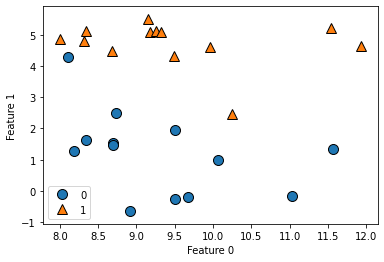

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (19, 2)
X_test.shape :  (7, 2)
y_train.shape :  (19,)
y_test.shape :  (7,)


## 線形サポートベクターマシンモデルの学習

In [5]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_train, y_train)

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9473684210526315

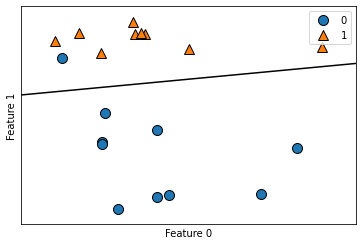

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_train, fill=False, eps=0.5)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## モデルの評価

In [7]:
model.score(X_test, y_test)

0.8571428571428571

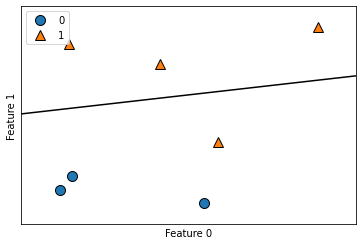

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_test, fill=False, eps=0.5)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## パラメータ調整

Cが大きくなれば正規化が弱くなり、個々のデータを正確にクラス分類を行うようになる。  
Cが小さい場合は1つ1つのデータではなく、大多数の分類を行うようになる。

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


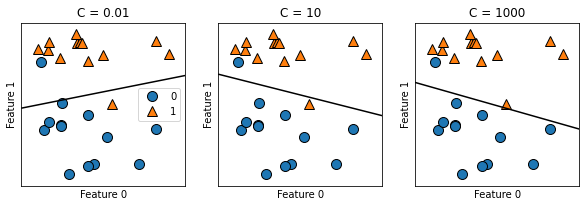

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
cs = [0.01, 10, 1000]

for c, ax in zip(cs, axes):
    model = LinearSVC(C=c)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C = " + str(c))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

# 2項分類を用いた多項分類

多項分類場合、複数の2項分類を組み合わせることで行うことができる。  
1つの項目かその他の項目を2項分類し、そのスコアが一番高いものが勝ちになる。

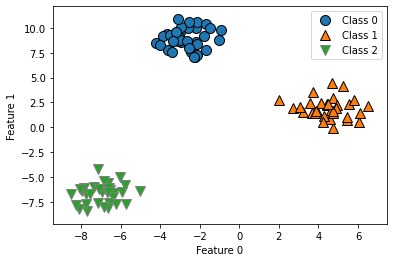

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

## 線形サポートベクターマシンモデルの学習

In [11]:
lsvm = LinearSVC().fit(X, y)

In [12]:
lsvm.coef_.shape

(3, 2)

In [13]:
lsvm.intercept_.shape

(3,)

## 予測結果の表示

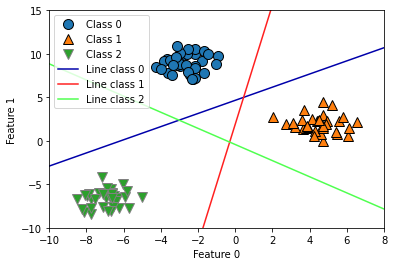

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lsvm.coef_, lsvm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'])

Text(0, 0.5, 'Feature 1')

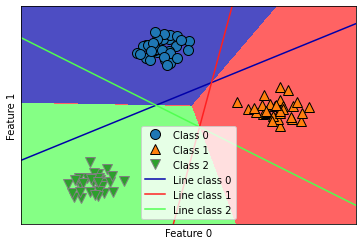

In [15]:
mglearn.plots.plot_2d_classification(lsvm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lsvm.coef_, lsvm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# カーネル法を用いたサポートベクターマシン

線形サポートベクターマシンは線形モデルのため下記のような訓練セットを学習することは難しい。  
そのためカーネル法を用いたサポートベクターマシンを用いる。  
一般的にSVMはこのモデルのことを指す。

# 2特徴量のサンプル

In [16]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


## サポートベクターマシンモデルの学習

In [17]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9473684210526315

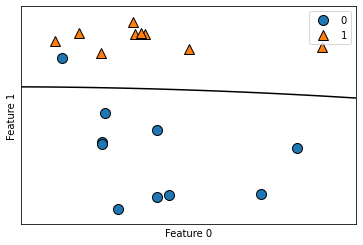

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_train, fill=False, eps=0.5)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## モデルの評価

In [19]:
model.score(X_test, y_test)

0.8571428571428571

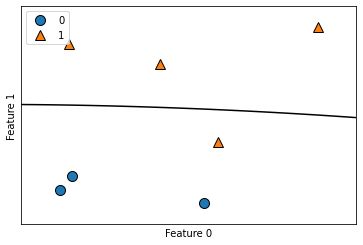

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_test, fill=False, eps=0.5)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## パラメータ調整

パラメータは下記2つある。  
- gamma: ガウシアンカーネルの幅の調整。  
gammaが大きい場合、個々のデータを重視するようになり、よりモデルが複雑になる。
- C: 正規化パラメータ  
Cが大きい場合、個々のデータを重視するようになり、よりモデルが複雑になる。

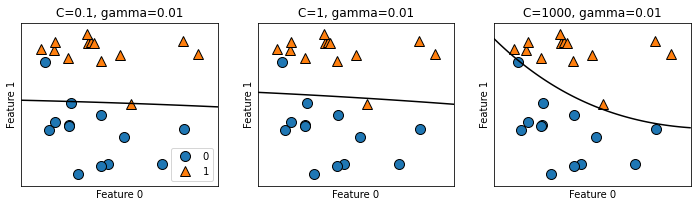

In [21]:
from sklearn.svm import SVC

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
cs = [0.1, 1, 1000]
gamma = 0.01
for c, ax in zip(cs, axes):
    model = SVC(C=c, gamma=gamma)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C=" + str(c) + ", gamma=" + str(gamma))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

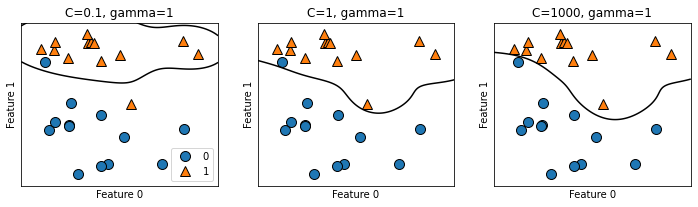

In [22]:
from sklearn.svm import SVC

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
cs = [0.1, 1, 1000]
gamma = 1
for c, ax in zip(cs, axes):
    model = SVC(C=c, gamma=gamma)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C=" + str(c) + ", gamma=" + str(gamma))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

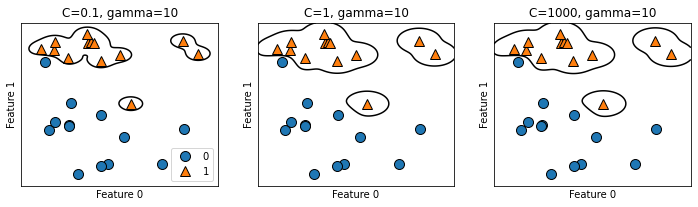

In [23]:
from sklearn.svm import SVC

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
cs = [0.1, 1, 1000]
gamma = 10
for c, ax in zip(cs, axes):
    model = SVC(C=c, gamma=gamma)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C=" + str(c) + ", gamma=" + str(gamma))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

## モデルセットの読み込み

In [24]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [25]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [28]:
print('特徴量の種類')
print(iris_dataset['feature_names'])
print('\nshape')
print(iris_dataset['data'].shape)
print('\n特徴量の確認')
print(iris_dataset['data'][:5])

特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

shape
(150, 4)

特徴量の確認
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [29]:
print('ラベルの種類')
print(iris_dataset['target_names'])
print('\nshape')
print(iris_dataset['target'].shape)
print('\nラベルの確認')
print(iris_dataset['target'])

ラベルの種類
['setosa' 'versicolor' 'virginica']

shape
(150,)

ラベルの確認
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [32]:
from sklearn.model_selection import train_test_split

X = iris_dataset['data']
y = iris_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=1)
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('y_valid.shape : ', y_valid.shape)
print('y_valid.shape : ', y_valid.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (84, 4)
y_train.shape :  (84,)
y_valid.shape :  (28,)
y_test.shape :  (38,)
X_test.shape :  (38, 4)
y_test.shape :  (38,)


## パラメータ調整

SVMのパラメータはCとgammmaがあるため、for文で繰り返すことで最適なパラメータを見つける。  
この方法をグリッドサーチと呼ぶ。

In [34]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        model = SVC(gamma=gamma, C=C)
        model.fit(X_train, y_train)
        score = model.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
model = SVC(**best_parameters)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.89


k分割交差検証と組み合わせることでより汎用なパラメータを見つけることができる。

In [52]:
from sklearn.model_selection import train_test_split

X = iris_dataset['data']
y = iris_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#k分割交差検証を用いるため、validデータセットを作成する必要はない
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=1)
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (112, 4)
y_train.shape :  (112,)
X_test.shape :  (38, 4)
y_test.shape :  (38,)


In [53]:
from sklearn.model_selection import cross_val_score

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        model = SVC(gamma=gamma, C=C)
        scores = cross_val_score(model, X_train, y_train, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
model = SVC(**best_parameters)
model.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

k分割交差検証を用いたグリッドサーチは良く使用される方法のためsklearnではGridSerchCVで簡単に利用できるようになっている。  

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

model = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [56]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [57]:
model.score(X_train, y_train)

0.9910714285714286

In [58]:
model.score(X_test, y_test)

0.9736842105263158

In [59]:
print("Best parameters: ", model.best_params_)
print("Best estimator: ", model.best_estimator_)
print("Best cross-validation score: ", model.best_score_)

Best parameters:  {'C': 10, 'gamma': 0.1}
Best estimator:  SVC(C=10, gamma=0.1)
Best cross-validation score:  0.9731225296442687


## パラメータ検証結果の可視化

In [60]:
results = pd.DataFrame(model.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001450,0.002900,0.005089,0.003431,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.003281,0.004380,0.003127,0.003833,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.003329,0.004081,0.000000,0.000000,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000668,0.001337,0.003418,0.003795,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.002343,0.003384,0.000000,0.000000,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


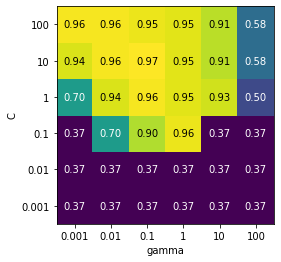

In [61]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

## ネストした交差検証

上記のk交差検証を用いたグリッドサーチ(GridSearchCV)はk交差検証を用いているため、訓練データと検証データはcv=5することで分割のばらつきを抑えている。  
しかし、この方法では訓練データとテストデータが1度のみしか分割されていないため、この際のばらつきに性能が依存する可能性が大きい。  
よって、下記の方法では訓練データとテストデータも毎度分割しなおすことで分割方法に依存しないモデルを作成することができる。

In [65]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), X, y, cv=5)

In [66]:
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score:  0.9800000000000001
